# Filtrado Analógico y Digital<a class="anchor" id="A"></a>
---


# Tabla de contenido

* [Filtrado Analógico y Digital](#A)
  * [Aproximaciones](#a)
      * [Aproximación Butterworth](#ab)
      * [Aproximación Chebyshev ](#ac)
        * [Ejemplo aplicado a la filtración de una señal ECG ](#ee)
  * [Ventanas](#v)
   * [Ejemplo aplicado para filtrar una señal EEG](#ae)

---

El filtrado de señales es una técnica fundamental en el procesamiento de señales y tiene una amplia gama de aplicaciones en diversas áreas. Como por ejemplo:
* Eliminación de ruido
* Extracción de información relevante
* Compresión de datos
* Análisis de sistemas
* Procesamiento de imágenes y señales multimedia
* Aplicaciones en comunicaciones


In [2]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

## Aproximaciones <a class="anchor" id="A"></a>

En el contexto del filtrado, las aproximaciones se refieren a los métodos utilizados para diseñar los coeficientes de un filtro que cumpla con ciertas especificaciones de respuesta en frecuencia. Las aproximaciones se utilizan para lograr un comportamiento deseado del filtro, como la atenuación de ciertas frecuencias o la forma de la respuesta en frecuencia.


##  Aproximación Butterworth <a class="anchor" id="ab"></a>

La aproximación Butterworth es un método comúnmente utilizado en el diseño de filtros analógicos y digitales, se destaca por su respuesta en frecuencia suave y maximización de la planicidad en la banda de paso.

La característica principal de la aproximación Butterworth es que su respuesta en frecuencia en la banda de paso es lo más plana posible dentro del rango de frecuencias de interés. Esto significa que no hay fluctuaciones ni crestas en la respuesta de amplitud en la banda de paso, lo que garantiza una atenuación uniforme de todas las frecuencias dentro de esa banda.

Además de la planicidad en la banda de paso, la aproximación Butterworth también presenta una transición suave y gradual entre la banda de paso y la banda de rechazo. No tiene una pendiente abrupta ni presenta oscilaciones en la respuesta en frecuencia, lo que evita distorsiones no deseadas en la señal.

A continuación un ejemplo de como se usa:

In [3]:
# Parámetros del filtro
N = 4  # Orden del filtro
fc = 10  # Frecuencia de corte en Hz
fs = 1000  # Frecuencia de muestreo en Hz

# Convertir frecuencia de corte a frecuencia normalizada
Wn = fc / (fs / 2)

# Diseñar el filtro Butterworth digital pasa altas
sos = signal.butter(N=N, Wn=Wn, btype='high', output='sos')

# Diseñar el filtro Butterworth analogico pasa altas
sos2 = signal.butter(N=N, Wn=fc , btype='high', analog=True, output='sos')

# Convertir los coeficientes del filtro analogico a la función de transferencia
num, den = signal.sos2tf(sos2)

# Imprimir los coeficientes de la función de transferencia
print("Numerador (coeficientes del numerador):", num)
print("Denominador (coeficientes del denominador):", den)


Numerador (coeficientes del numerador): [1. 0. 0. 0. 0.]
Denominador (coeficientes del denominador): [1.00000000e+00 2.61312593e+01 3.41421356e+02 2.61312593e+03
 1.00000000e+04]


La frecuencia de corte normalizada es un parámetro utilizado en el diseño de filtros digitales que se expresa como una fracción de la frecuencia de muestreo. En el contexto de los filtros Butterworth, la frecuencia de corte normalizada se define como la frecuencia de corte del filtro dividida por la mitad de la frecuencia de muestreo.

En términos matemáticos, si tienes una frecuencia de corte fc y una frecuencia de muestreo fs, la frecuencia de corte normalizada Wn se calcula de la siguiente manera:

$$\LARGE wn=\dfrac{fc}{\dfrac{fs}{2}}$$

La función <code>**signal.butter**</code> es parte del módulo scipy.signal y se utiliza para diseñar filtros Butterworth. Toma como entrada los parámetros necesarios para especificar el tipo de filtro y sus características, y devuelve los coeficientes del filtro.

1. **N** es el orden del filtro.
2. **Wn** es la frecuencia de corte o las frecuencias de corte, dependiendo del tipo de filtro.
3. **btype** especifica el tipo de filtro ('lowpass', 'highpass', 'bandpass', 'bandstop').
4. **analog** indica si el filtro es analógico o digital.
5. **output** Formato de salida de los coeficientes del filtro. Se establece como 'sos' para obtener los coeficientes en el formato de segunda orden en serie (Second-Order Sections).

La función **signal.butter** devuelve una matriz sos que contiene los coeficientes del filtro Butterworth en el formato de segunda orden en serie. Cada fila de la matriz sos representa una sección de segundo orden del filtro.


In [4]:
# Generar una señal de prueba
t = np.linspace(0, 1, 1000)  # Vector de tiempo
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 50 * t)  # Señal de entrada

# Filtrar la señal usando sosfilt
y = signal.sosfilt(sos, x)



La función signal.sosfilt se utiliza para aplicar un filtro de respuesta al impulso finito (FIR) en formato de segunda orden en serie (SOS) a una señal de entrada.

Recibe dos argumentos principales:

1. **sos**: Matriz de coeficientes del filtro en formato SOS. Cada fila de la matriz representa una sección de segundo orden del filtro.
2. **x**: Señal de entrada a la que se aplicará el filtro.

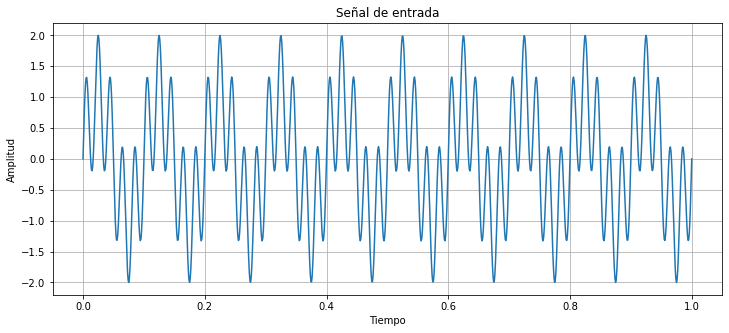

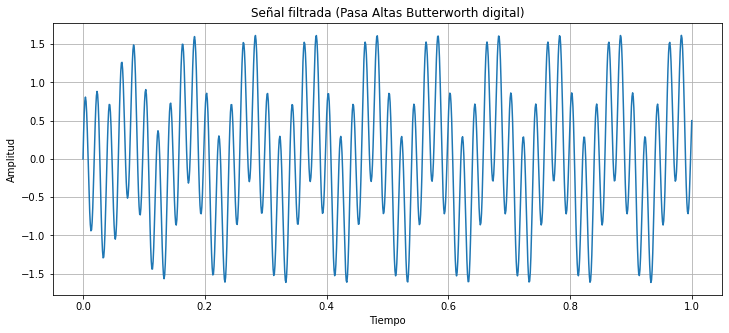

In [5]:
# Graficar la señal de entrada

plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal de entrada')
plt.grid(True)
plt.show()

# Graficar la señal filtrada
plt.figure(figsize=(12, 5))
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal filtrada (Pasa Altas Butterworth digital)')
plt.grid(True)
plt.show()


Numerador (coeficientes del numerador): [1. 0. 0. 0. 0.]
Denominador (coeficientes del denominador): [1.00000000e+00 1.04525037e+02 5.46274170e+03 1.67240060e+05
 2.56000000e+06]


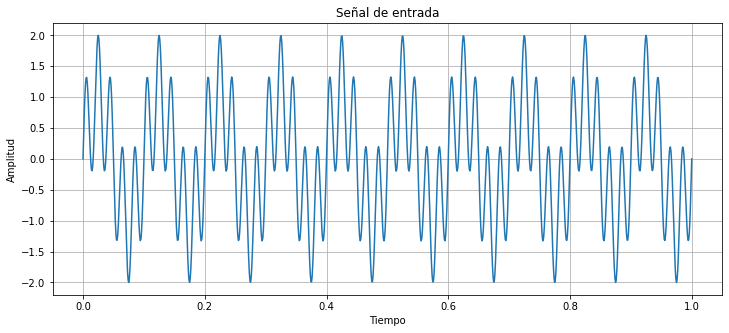

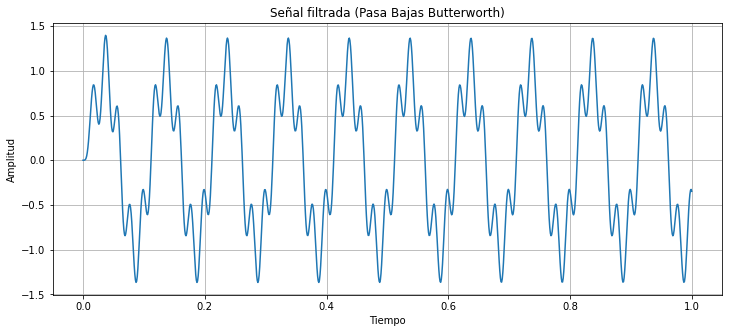

In [6]:
#Ejemplo de aproximacion butterworth digital para pasabajas
# Parámetros del filtro
N = 4  # Orden del filtro
fc = 40  # Frecuencia de corte en Hz
fs = 1000  # Frecuencia de muestreo en Hz

# Convertir frecuencia de corte a frecuencia normalizada
Wn = fc / (fs / 2)

# Diseñar el filtro Butterworth pasa bajas
sos = signal.butter(N=N, Wn=Wn, btype='low', output='sos')

# Diseñar el filtro Butterworth analogico pasa bajas
sos2 = signal.butter(N=N, Wn=fc , btype='high', analog=True, output='sos')

# Convertir los coeficientes del filtro analogico a la función de transferencia
num, den = signal.sos2tf(sos2)

# Imprimir los coeficientes de la función de transferencia
print("Numerador (coeficientes del numerador):", num)
print("Denominador (coeficientes del denominador):", den)

# Generar una señal de prueba
t = np.linspace(0, 1, 1000)  # Vector de tiempo
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 50 * t)  # Señal de entrada

# Filtrar la señal usando sosfilt
y = signal.sosfilt(sos, x)

# Graficar la señal de entrada
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal de entrada')
plt.grid(True)
plt.show()

# Graficar la señal filtrada
plt.figure(figsize=(12, 5))
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal filtrada (Pasa Bajas Butterworth)')
plt.grid(True)
plt.show()

## Transformación bilineal

La transformación bilineal es un método utilizado para convertir un filtro analógico en su equivalente digital. Permite mapear un filtro analógico en el dominio de la frecuencia a un filtro digital en el dominio de la frecuencia discreta.

En el proceso de muestreo de una señal analógica, la transformación bilineal aproxima el filtro analógico por un filtro digital mediante una relación entre las frecuencias analógicas y digitales. Esta transformación se basa en el muestreo de la respuesta en frecuencia del filtro analógico y la asignación de las frecuencias digitales correspondientes.

Es representado por la formula:

 $$\large H(s) = \frac{a_0}{s^2+a_1s+a_0}$$

 $$\large H(z) = H(s)|_{s= \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}}}$$

 $$\large H(z) = \frac{a_0T^2+2a_0T^2z^{-1}+a_0T^2z^{-2}}{(4+2a_1T+a_0T^2)+(2a_0T^2-8)z^{-1}+(4-2a_1T+a_0T^2)z^{-2}}$$

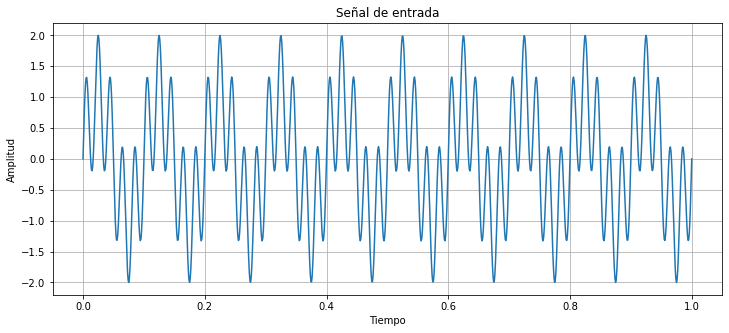

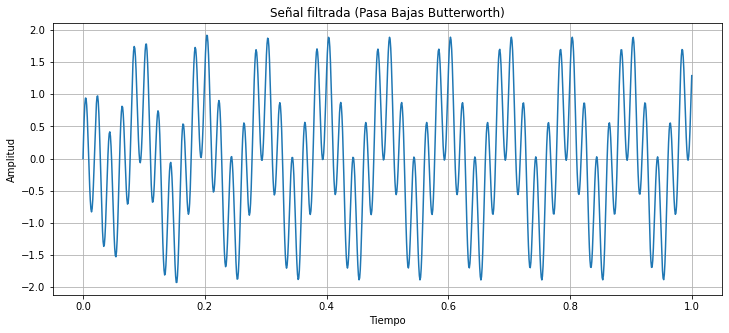

In [7]:
# Convertir el filtro analógico a su equivalente digital utilizando la transformación bilineal
fs = 1000  # Frecuencia de muestreo en Hz

b_digital, a_digital = signal.bilinear(num, den, fs=fs)

# Filtrar la señal utilizando el filtro digital
y = signal.lfilter(b_digital, a_digital, x)

# Ajustar el vector de tiempo para que tenga la misma longitud que y
t_adjusted = np.linspace(0, 1, len(y))

# Graficar la señal de entrada
plt.figure(figsize=(12, 5))
plt.plot(t_adjusted, x, label='Señal de entrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal de entrada')
plt.grid(True)
plt.savefig('senal_entrada.png')  # Guardar la figura como 'senal_entrada.png'
plt.show()

# Graficar la señal filtrada
plt.figure(figsize=(12, 5))
plt.plot(t_adjusted, y, label='Señal filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal filtrada (Pasa Bajas Butterworth)')
plt.grid(True)
plt.savefig('senal_filtrada.png')  # Guardar la figura como 'senal_filtrada.png'
plt.show()

La función <code> **signal.bilinear(b, a, fs=fs)**</code>  en SciPy realiza la transformación bilineal de un filtro analógico representado por los coeficientes **b** y **a** en su equivalente digital.

La transformación bilineal convierte los coeficientes del filtro analógico en coeficientes para el filtro digital correspondiente utilizando la frecuencia de muestreo **fs**. Los coeficientes del filtro digital resultante se devuelven en las variables **b_digital** y **a_digital**.

##  Filtros FIR

Un filtro FIR (Finite Impulse Response, en inglés) es un tipo de filtro digital cuya respuesta al impulso es de duración finita. Esto significa que la salida del filtro solo depende de una cantidad finita de muestras de la señal de entrada.

Un filtro FIR se caracteriza por tener una respuesta al impulso que se extiende a lo largo de un número finito de muestras. Matemáticamente, se puede representar como una suma ponderada de las muestras de entrada y los coeficientes del filtro, donde los coeficientes determinan la forma de la respuesta del filtro.


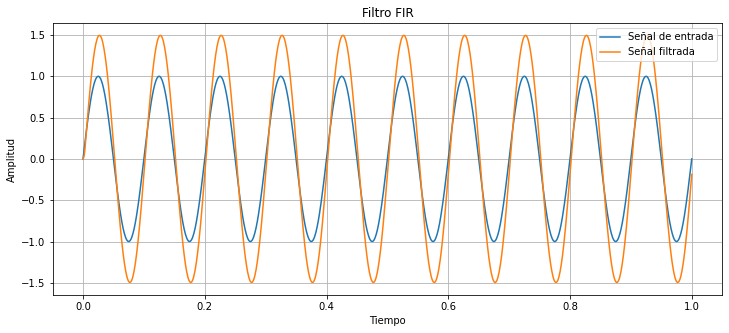

In [8]:
# Definir los coeficientes del filtro FIR
b = [0.2, 0.3, 0.5, 0.3, 0.2]

# Generar una señal de prueba
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 10 * t)  # Señal de entrada

# Aplicar el filtro FIR a la señal de entrada
y = signal.lfilter(b, 1, x)

# Graficar la señal de entrada y la señal filtrada
plt.figure(figsize=(12, 5))
plt.plot(t, x, label='Señal de entrada')
plt.plot(t, y, label='Señal filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtro FIR')
plt.legend()
plt.grid(True)
plt.show()

En este ejemplo, los coeficientes del filtro FIR se definen en la lista **b**. Estos coeficientes determinan la respuesta del filtro. La señal de entrada **x** es una onda sinusoidal, y se aplica el filtro FIR utilizando la función <code>**signal.lfilter()**</code> de <code>**scipy.signal**</code>. La señal filtrada se almacena en la variable **y**. Finalmente, se grafican la señal de entrada y la señal filtrada para visualizar los efectos del filtro FIR.

##  Aproximación Chebyshev <a class="anchor" id="ac"></a>

La aproximación Chebyshev es otro método utilizado en el diseño de filtros digitales. Al igual que la aproximación Butterworth, pertenece a la familia de aproximaciones de filtro analógico a digital. El diseño del filtro Chebyshev se basa en la aproximación de la función de transferencia mediante polinomios de Chebyshev.

La característica distintiva de los filtros Chebyshev es que permiten un mayor control sobre la respuesta en frecuencia en comparación con los filtros Butterworth. Estos filtros pueden presentar una mayor ganancia en la banda de paso, pero a cambio ofrecen una mayor atenuación en la banda de rechazo.

En términos prácticos, esto significa que los filtros Chebyshev pueden tener una respuesta más empinada en la banda de transición entre la banda de paso y la banda de rechazo, lo que permite lograr una mayor atenuación de las frecuencias no deseadas.

In [9]:
# Parámetros del filtro
N = 4  # Orden del filtro
f1 = 45  # Frecuencia de corte inferior en Hz
f2 = 55  # Frecuencia de corte superior en Hz
fs = 1000  # Frecuencia de muestreo en Hz

# Convertir frecuencias de corte a frecuencias normalizadas
Wn = [f1 / (fs / 2), f2 / (fs / 2)]

# Diseñar el filtro Chebyshev pasa bandas
sos = signal.cheby2(N=N, rs=30, Wn=Wn, btype='bandpass', output='sos')

La función <code>**signal.cheby2()**</code> en la biblioteca scipy.signal se utiliza para diseñar un filtro Chebyshev tipo II. Esta función devuelve los coeficientes de segundo orden (de tipo SOS, "Second-Order Sections") que representan el filtro.

Los parámetros utilizados en la función <code>signal.cheby2()</code> son los siguientes:

1. **N**: Orden del filtro.
2. **rs**: Especifica la cantidad de atenuación en la banda de rechazo en decibeles (dB).
3. **Wn**: Frecuencias de corte normalizadas. Para un filtro pasa bandas, se especifica como una lista [f1, f2] donde f1 y f2 son las frecuencias de corte inferior y superior respectivamente, normalizadas entre 0 y 1.
4. **btype**: Tipo de filtro. En este caso, se especifica como 'bandpass' para diseñar un filtro pasa bandas.
5. **output**: Especifica el tipo de salida deseada. En este caso, se establece como 'sos' para obtener los coeficientes de segundo orden.

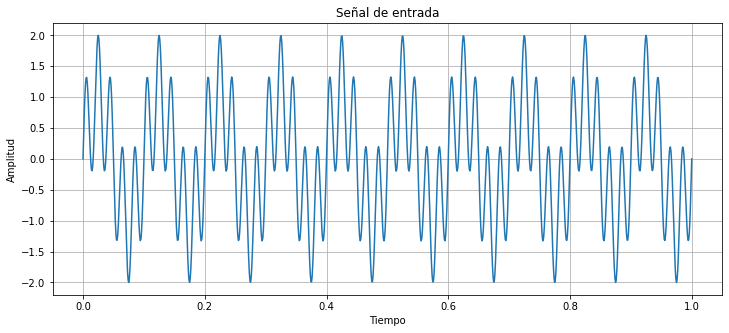

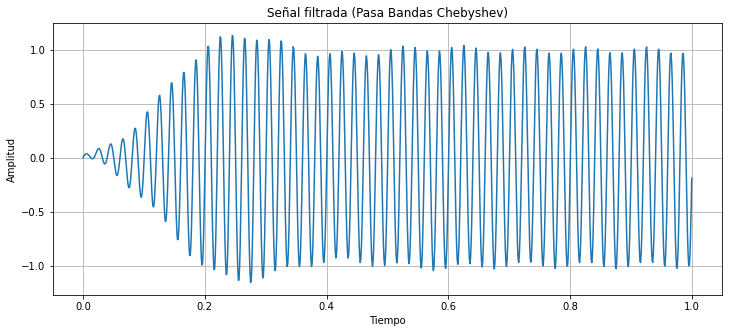

In [10]:
# Generar una señal de prueba
t = np.linspace(0, 1, 1000)  # Vector de tiempo
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 50 * t)  # Señal de entrada

# Filtrar la señal usando sosfilt
y = signal.sosfilt(sos, x)

# Graficar la señal de entrada
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal de entrada')
plt.grid(True)
plt.show()

# Graficar la señal filtrada
plt.figure(figsize=(12, 5))
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal filtrada (Pasa Bandas Chebyshev)')
plt.grid(True)
plt.show()

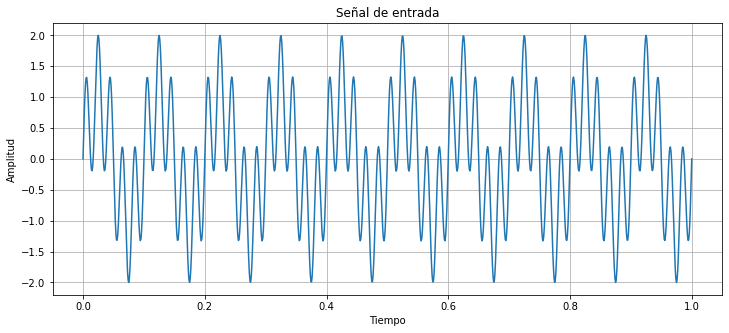

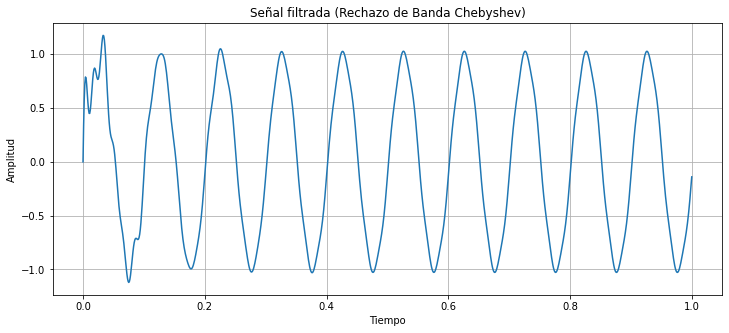

In [11]:
# Mismo ejemplo pero con rechazabanda
# Parámetros del filtro
N = 4  # Orden del filtro
f1 = 45  # Frecuencia de corte inferior en Hz
f2 = 55  # Frecuencia de corte superior en Hz
fs = 1000  # Frecuencia de muestreo en Hz

# Convertir frecuencias de corte a frecuencias normalizadas
Wn = [f1 / (fs / 2), f2 / (fs / 2)]

# Diseñar el filtro Chebyshev rechazabanda
sos = signal.cheby2(N=N, rs=30, Wn=Wn, btype='bandstop', output='sos')

# Generar una señal de prueba
t = np.linspace(0, 1, 1000)  # Vector de tiempo
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 50 * t)  # Señal de entrada

# Filtrar la señal usando sosfilt
y = signal.sosfilt(sos, x)

# Graficar la señal de entrada
plt.figure(figsize=(12, 5))
plt.plot(t, x)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal de entrada')
plt.grid(True)
plt.show()

# Graficar la señal filtrada
plt.figure(figsize=(12, 5))
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal filtrada (Rechazo de Banda Chebyshev)')
plt.grid(True)
plt.show()

* **Tanto la aproximación Butterrworth como la aproximación Chebyshev se pueden representar en el dominio analogico  como en el dominio digital.**
* **A ambas aproximaciones se les puede aplicar la transformación bilineal.**

##  Ejemplo aplicado para filtrar una señal ECG <a class="anchor" id="ee"></a>

In [12]:
import pandas as pd
import scipy.io
pi=np.pi

* La declaración <code>**import pandas**</code> as <code>**pd**</code> se utiliza para importar el módulo pandas en Python y asignarle el alias <code>**"pd"**</code>.<br>Pandas es una biblioteca de análisis de datos muy popular en Python que proporciona estructuras de datos y herramientas para manipular y analizar datos de manera eficiente. Al importar pandas utilizando <code>**import pandas**</code> as <code>**pd**</code>, se puede acceder a las funciones y clases proporcionadas por pandas utilizando el alias <code>**pd**</code> como prefijo.

* El módulo <code>**scipy.io**</code> es parte de la biblioteca SciPy y proporciona funciones para leer y escribir datos en varios formatos de archivos. Está diseñado principalmente para leer y escribir archivos de datos científicos.

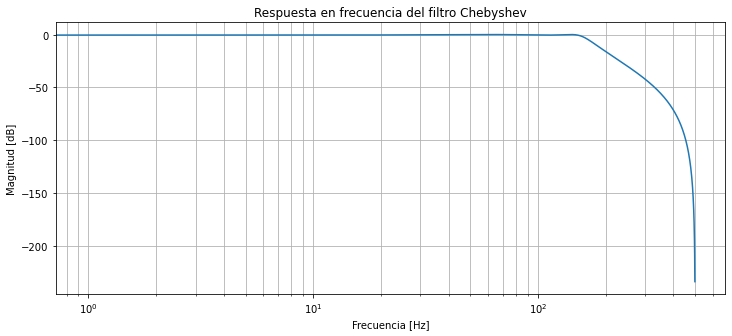

In [13]:
chevyfiltro = signal.cheby1(N=4, rp=0.5, Wn=150, btype='lowpass', fs=1000, output='sos' )
w, h= signal.sosfreqz(chevyfiltro, fs=fs)
plt.figure(figsize=(12, 5))
plt.semilogx(w,20* np.log10(abs(h)));
plt.grid(True, which='both')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Respuesta en frecuencia del filtro Chebyshev')
plt.show()

**La función** <code>**signal.sosfreqz()**</code> se utiliza para calcular la respuesta de frecuencia de un filtro de segundo orden (SOS) definido por los coeficientes chevyfiltro.

Los parámetros de la función son:

* **chevyfiltro**: Los coeficientes del filtro de segundo orden (SOS) que se obtienen mediante una función de diseño de filtro, como signal.cheby2(), que devuelve los coeficientes de un filtro Chebyshev.
* **fs**: Frecuencia de muestreo de la señal.
La función devuelve dos arrays:
* **w**: Frecuencias normalizadas en radianes por muestra. Estas frecuencias corresponden a los puntos en los que se evalúa la respuesta de frecuencia.
* **h**: Respuesta de frecuencia del filtro en cada una de las frecuencias evaluadas. La respuesta de frecuencia es una medida de cómo el filtro afecta la amplitud y fase de las diferentes frecuencias en la señal de entrada.

<code>**plt.semilogx(w, 20 * np.log10(abs(h)))**</code>: Grafica la respuesta en frecuencia del filtro utilizando la función </code>**semilogx**</code> del submódulo pyplot de la librería matplotlib. El eje x utiliza una escala logarítmica. Se utiliza la función <code>**np.log10**</code> para convertir la magnitud de la respuesta en decibelios.

Para abrir un archivo csv en Jupyter Notebook 
<br> https://www.youtube.com/watch?v=V87m9SltcI8

Para abrir un archivo csv en Google Colab
<br> https://saturncloud.io/blog/how-to-read-csv-to-dataframe-in-google-colab/

 codigo para Google Colab
 
 from google.colab import drive
 drive.mount('/content/drive')
 
 1. ECG_dataframe = pd.read_csv('/content/drive/'): Lee el archivo CSV que contiene los datos del ECG y los carga en un DataFrame de pandas llamado ECG_dataframe. La ruta del archivo CSV especificada indica que se encuentra en la carpeta /content/drive/MyDrive en Google Drive. Asegúrate de proporcionar la ruta correcta según la ubicación de tu archivo CSV.

In [20]:
import pandas as pd


In [21]:
ECG_dataframe= pd.read_csv("ECG (1) (1).csv")

Ts= ECG_dataframe['Tiempo(s)'][22]-ECG_dataframe['Tiempo(s)'][21]
fs=1/Ts

El código realiza la lectura de un archivo CSV que contiene datos de un electrocardiograma (ECG) y realiza algunas operaciones iniciales de procesamiento de los datos.

2. Ts = ECG_dataframe['Tiempo(s)'][22] - ECG_dataframe['Tiempo(s)'][21]: Calcula la diferencia de tiempo entre dos muestras consecutivas del ECG. En este caso, se está tomando la diferencia entre la muestra 22 y la muestra 21 del campo 'Tiempo(s)' en el DataFrame ECG_dataframe. Esto se utiliza para determinar el intervalo de tiempo entre muestras adyacentes en el ECG.

3. fs = 1 / Ts: Calcula la frecuencia de muestreo del ECG dividiendo 1 entre el intervalo de tiempo entre muestras Ts. Esto proporciona la cantidad de muestras por segundo, que es la frecuencia de muestreo.

In [23]:
# Obtener la señal ECG y el tiempo desde el DataFrame
ecg = ECG_dataframe['CH1(V)'].values
t = ECG_dataframe['Tiempo(s)'].values

* <code>**ECG_dataframe['CH1(V)'].values**</code> devuelve un arreglo NumPy que contiene los valores de la columna **'CH1(V)'** del dataframe<code> **ECG_dataframe.**</code> Estos valores representan las mediciones o muestras de una señal de electrocardiograma (ECG) en la canal CH1.
* <code>**ECG_dataframe['Tiempo(s)'].values**</code> devuelve un arreglo NumPy que contiene los valores de la columna **'Tiempo(s)'** del dataframe <code>**ECG_dataframe** </code> . Estos valores representan los instantes de tiempo asociados a cada muestra de la señal de ECG.

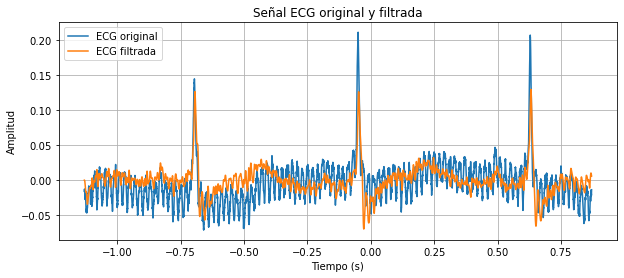

In [24]:
# Diseñar el filtro Chebyshev
chevyfiltro1 = signal.cheby1(N=4, rp=0.5, Wn=150, btype='lowpass', fs=4000, output='sos')

# Diseñar el filtro Chebyshev2
chevyfiltro2 = signal.cheby1(N=4, rp=0.5, Wn=1, btype='highpass', fs=4000, output='sos')

# Definir los parámetros del filtro notch
f0 = 50
fs = 4000
# Calcular las frecuencias de corte para el filtro notch
bw = 2           # Ancho de banda de la banda a rechazar (en Hz)
Wn = [((f0 - bw/2) / (fs/2)), ((f0 + bw/2) / (fs/2))]

# Crear el filtro notch Butterworth
notchfiltro = signal.butter(N=10, Wn=Wn, btype='bandstop', output='sos')
# Filtrar la señal ECG
filtered_ecg1 = signal.sosfilt(chevyfiltro1, ecg)
filtered_ecg2 = signal.sosfilt(chevyfiltro2, filtered_ecg1)
filtered_ecg3 = signal.sosfilt(notchfiltro, filtered_ecg2)
# Trazar la señal ECG original y filtrada
plt.figure(figsize=(10, 4))
plt.plot(t, ecg, label='ECG original')
plt.plot(t, filtered_ecg3, label='ECG filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal ECG original y filtrada')
plt.legend()
plt.grid(True)
plt.show()

## Ventanas. <a class="anchor" id="v"></a>

Las ventanas de Hamming, Hann (o Hanning), Blackman y otras son funciones matemáticas que se utilizan comúnmente en el procesamiento de señales para aplicar una ponderación a las muestras de una señal antes de realizar ciertas operaciones, como la transformada de Fourier o el análisis espectral. Estas ventanas tienen propiedades específicas que las hacen adecuadas para diferentes aplicaciones.

Estas ventanas se aplican multiplicando las muestras de una señal por los valores de la ventana correspondientes antes de realizar operaciones como la transformada de Fourier. Esto permite suavizar los bordes de la señal y reducir el efecto de las discontinuidades, lo que puede mejorar la precisión y la interpretación de los resultados en el dominio de la frecuencia. Cada ventana tiene sus propias características y es importante elegir la ventana adecuada según las necesidades de la aplicación y las propiedades deseadas en el análisis de la señal.

**Ventana Hanning**:

La ventana de Hanning es una ventana de tipo no rectangular ampliamente utilizada en el procesamiento de señales y análisis espectral. Algunas de las características de la ventana de Hanning son las siguientes:

* **Forma**: La ventana de Hanning tiene una forma simétrica que se asemeja a medio ciclo de una onda sinusoidal.

* **Atenuación de los lóbulos laterales**: La ventana de Hanning reduce los lóbulos laterales en comparación con otras ventanas como la ventana rectangular. Esto significa que la energía de la señal se concentra más en la banda principal y se reducen las interferencias de frecuencias cercanas.

* **Atenuación del ruido de frecuencia fuera de la banda de interés**: La ventana de Hanning proporciona una buena atenuación del ruido de frecuencia fuera de la banda de interés, lo que ayuda a mejorar la selectividad en el análisis espectral.

* **Resolución espectral**: La ventana de Hanning tiene una resolución espectral moderada, lo que significa que puede proporcionar un buen equilibrio entre el ancho de banda y la capacidad de distinguir componentes de frecuencia cercanos.

* **Pérdida de energía**: La ventana de Hanning introduce una cierta pérdida de energía en la señal debido a la multiplicación por una función no constante. Esto puede afectar ligeramente la amplitud de la señal original.

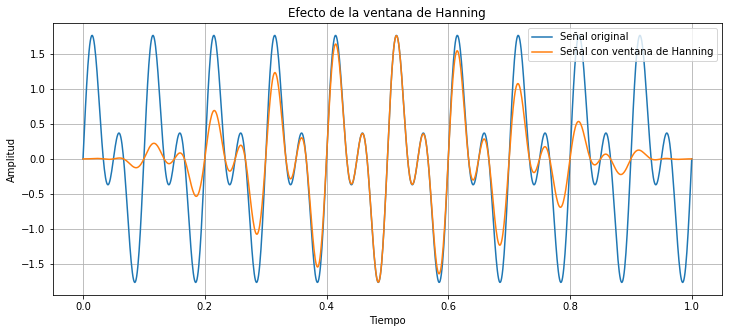

In [25]:
# Generar una señal de prueba
t = np.linspace(0, 1, 1000)  # Vector de tiempo
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)  # Señal de entrada

# Aplicar la ventana de Hanning
window = np.hanning(len(x))
x_windowed = x * window

# Graficar la señal original y la señal con la ventana de Hanning
plt.figure(figsize=(12, 5))
plt.plot(t, x, label='Señal original')
plt.plot(t, x_windowed, label='Señal con ventana de Hanning')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Efecto de la ventana de Hanning')
plt.legend()
plt.grid(True)
plt.show()

**Ventana Haming**:

La ventana de Hamming es otra ventana ampliamente utilizada en el procesamiento de señales y análisis espectral. Aquí están algunas características de la ventana de Hamming:

* **Forma**: La ventana de Hamming también tiene una forma simétrica similar a medio ciclo de una onda sinusoidal, al igual que la ventana de Hanning.

* **Atenuación de los lóbulos laterales**: Al igual que la ventana de Hanning, la ventana de Hamming también reduce los lóbulos laterales en comparación con una ventana rectangular. Esto ayuda a mejorar la selectividad en el análisis espectral y reduce las interferencias de frecuencias cercanas.

* **Atenuación del ruido fuera de la banda de interés**: La ventana de Hamming proporciona una atenuación aceptable del ruido de frecuencia fuera de la banda de interés, aunque en comparación con la ventana de Hanning, los lóbulos laterales pueden ser ligeramente más pronunciados.

* **Resolución espectral**: La ventana de Hamming ofrece una buena resolución espectral y puede proporcionar un equilibrio entre la atenuación de lóbulos laterales y la resolución en el análisis de frecuencia.

* **Pérdida de energía**: Al igual que la ventana de Hanning, la ventana de Hamming también introduce una cierta pérdida de energía en la señal debido a la multiplicación por una función no constante.

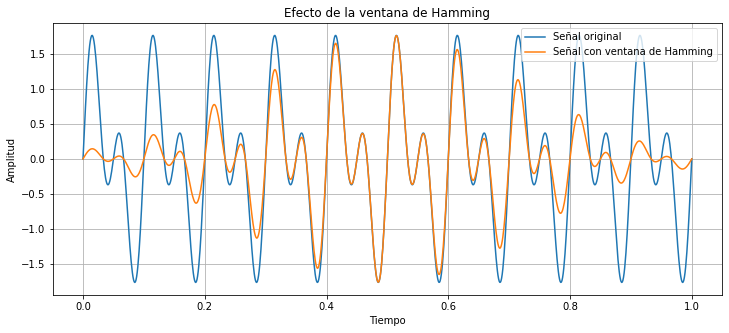

In [26]:
# Generar una señal de prueba
t = np.linspace(0, 1, 1000)  # Vector de tiempo
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)  # Señal de entrada

# Aplicar la ventana de Hamming
window = np.hamming(len(x))
x_windowed = x * window

# Graficar la señal original y la señal con la ventana de Hamming
plt.figure(figsize=(12, 5))
plt.plot(t, x, label='Señal original')
plt.plot(t, x_windowed, label='Señal con ventana de Hamming')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Efecto de la ventana de Hamming')
plt.legend()
plt.grid(True)
plt.show()

La ventana de **Hanning** y la ventana de **Hamming** son muy similares en su forma y propiedades. Ambas ventanas son simétricas y se utilizan comúnmente en aplicaciones de procesamiento de señales y análisis espectral.

La principal diferencia entre las ventanas de **Hanning** y **Hamming** radica en la forma en que atenúan los lóbulos laterales. La ventana de **Hanning** tiene una atenuación más suave de los lóbulos laterales, lo que la hace adecuada para aplicaciones donde se desea una transición más gradual entre la señal y el ruido. Por otro lado, la ventana de **Hamming** tiene una atenuación más rápida de los lóbulos laterales, lo que la hace adecuada para aplicaciones donde se desea un mejor control sobre la atenuación de los lóbulos laterales.

**Ventana cosenoidal**

La ventana cosenoidal, también conocida como ventana de Bartlett, es una función de ventana que se utiliza comúnmente en el procesamiento de señales y análisis espectral. Tiene las siguientes características:

* **Forma triangular**: La ventana cosenoidal tiene una forma triangular, donde los valores en los extremos de la ventana son cero y aumentan linealmente hacia el centro de la ventana.

* **Simetría**: La ventana cosenoidal es simétrica respecto al punto medio de la ventana.

* **Respuesta en frecuencia**: La ventana cosenoidal tiene una respuesta en frecuencia que se extiende hasta los lóbulos laterales, lo que significa que puede presentar un mayor derrame espectral en comparación con otras ventanas más concentradas en el dominio frecuencial.

* **Ancho del lóbulo principal**: El ancho del lóbulo principal de la ventana cosenoidal es más amplio en comparación con ventanas como la ventana de Hanning o Hamming. Esto significa que tiene una resolución espectral relativamente más baja.

* **Nivel de atenuación de los lóbulos laterales**: Los lóbulos laterales de la ventana cosenoidal tienen un nivel de atenuación menor en comparación con otras ventanas como la ventana de Hanning o Hamming.

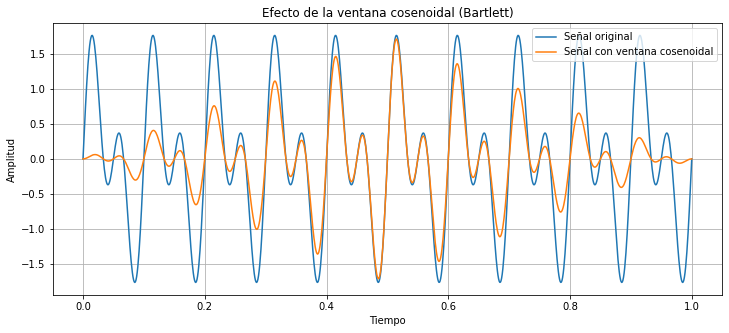

In [27]:
# Generar una señal de prueba
t = np.linspace(0, 1, 1000)  # Vector de tiempo
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)  # Señal de entrada

# Aplicar la ventana cosenoidal (Bartlett)
window = np.bartlett(len(x))
x_windowed = x * window

# Graficar la señal original y la señal con la ventana cosenoidal
plt.figure(figsize=(12, 5))
plt.plot(t, x, label='Señal original')
plt.plot(t, x_windowed, label='Señal con ventana cosenoidal')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Efecto de la ventana cosenoidal (Bartlett)')
plt.legend()
plt.grid(True)
plt.show()

**Ventana gaussiana**

La ventana gaussiana, también conocida como ventana de Gauss, es una función de ventana que se utiliza comúnmente en el procesamiento de señales y el análisis espectral. Algunas de las características de la ventana gaussiana son:

* **Forma de campana**: La ventana gaussiana tiene una forma de campana suave y continua. La amplitud de la ventana disminuye gradualmente hacia los bordes, lo que la hace adecuada para atenuar los efectos de las discontinuidades en las señales.

* **Distribución gaussiana**: La forma de la ventana gaussiana está determinada por una distribución gaussiana o normal. Esto significa que los valores de la ventana se calculan utilizando una función exponencial de la distancia al centro de la ventana.

* **Ancho ajustable**: La forma de la ventana gaussiana se puede ajustar cambiando el ancho de la campana. Esto permite controlar la cantidad de suavizado aplicado a la señal.

* **Buena resolución espectral**: La ventana gaussiana tiene una respuesta en frecuencia más estrecha en comparación con otras ventanas, lo que resulta en una mejor resolución espectral en el análisis de Fourier.

* **Buena supresión de lóbulos secundarios**: La ventana gaussiana tiene una capacidad inherente para suprimir los lóbulos secundarios, lo que ayuda a reducir las interferencias y mejorar la calidad del análisis espectral.

* **Sensible a la selección de parámetros**: La ventana gaussiana requiere un ajuste cuidadoso de sus parámetros, como el ancho de la campana y el centro, para lograr un equilibrio adecuado entre suavizado y resolución espectral.

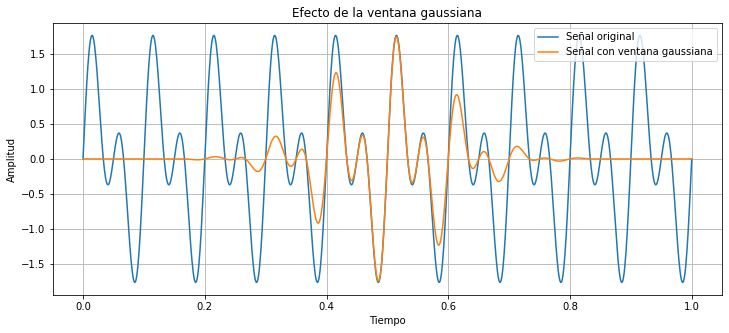

In [28]:
def gaussian_window(length, std):
    t = np.linspace(-0.5, 0.5, length)
    return np.exp(-0.5 * (t / std) ** 2)

# Generar una señal de prueba
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)

# Aplicar la ventana gaussiana
window = gaussian_window(len(x), std=0.1)
x_windowed = x * window

# Graficar la señal original y la señal con la ventana gaussiana
plt.figure(figsize=(12, 5))
plt.plot(t, x, label='Señal original')
plt.plot(t, x_windowed, label='Señal con ventana gaussiana')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Efecto de la ventana gaussiana')
plt.legend()
plt.grid(True)
plt.show()

La diferencia en la implementación de la ventana **gaussiana** en comparación con otras ventanas como Hanning, Hamming o Bartlett se debe a su naturaleza matemática.

Las ventanas **Hanning**, **Hamming** y **Bartlett** son ventanas simétricas y se definen mediante funciones algebraicas simples, como funciones coseno o funciones lineales. Estas ventanas son fáciles de calcular y no requieren operaciones matemáticas complejas.

Por otro lado, la ventana gaussiana se define mediante una función exponencial de la forma $e^{-\dfrac{1}{2}*\dfrac{t}{std}^{2}}$, donde **t** es el tiempo relativo y **std** es el desviación estándar que controla el ancho de la ventana. La función exponencial y el cálculo de la ventana gaussiana requieren operaciones más complejas, como el cálculo de exponentes y operaciones de potencia.

Debido a esta diferencia en la naturaleza matemática de la ventana gaussiana, su implementación implica el cálculo de una función exponencial y, por lo tanto, requiere una implementación más detallada y específica en comparación con las ventanas simétricas más simples.

## Ejemplo aplicado para filtrar una señal EEG <a class="anchor" id="ae"></a>

Para abrir un archivo .mat en Jupyter Notebook 
https://www.youtube.com/watch?v=Bs-dkCxlCfI

Para abrir un archivo .mat en Google Colab


data= scipy.io.loadmat("/content/drive/MyDrive/eeg.mat")

La función <code>**scipy.io.loadmat()**</code> se utiliza para cargar datos almacenados en un archivo MATLAB (.mat) en Python utilizando el módulo <code>**scipy.io**</code>. La ruta especificada en la función debe ser la ubicación del archivo <code>.mat</code> que se desea cargar.

En el ejemplo proporcionado, la función <code>scipy.io.loadmat('/content/drive/MyDrive/eeg.mat')</code> carga los datos almacenados en el archivo <code>**eeg.mat**</code> ubicado en la ruta <code>"/content/drive/MyDrive/"</code> y devuelve un objeto dict que contiene los datos cargados desde el archivo.

In [53]:
import scipy.io
data = scipy.io.loadmat("eeg (3).mat")

In [54]:
senal = data['x']
senal = np.array(senal).flatten()

* <code>data['x']</code> accede a la variable o matriz almacenada en el objeto dict llamado data, utilizando la clave 'x'. Esto implica que el <code>archivo.mat</code> contiene una variable o matriz llamada 'x'.

* <code>**senal = np.array(senal).flatten()**</code> convierte la variable senal en un arreglo de tipo <code>**numpy.array**</code> y utiliza el método <code>**flatten()** </code>para convertir cualquier matriz multidimensional en un arreglo unidimensional (aplanado). Esto es útil si deseas trabajar con la señal en forma de vector unidimensional.

In [55]:
# Obtener la frecuencia de muestreo
fs=data['fs'][0]
# Crear el vector de tiempo
tiempo = np.array(np.arange(len(senal))) / fs
print(tiempo.shape)
print(senal.shape)

(61441,)
(61441,)


Se imprimen las formas <code>**(shapes)**</code> de los arreglos tiempo y senal utilizando <code>print**(tiempo.shape)**</code> y <code>print **(senal.shape)**</code>. Esto muestra la dimensión de cada arreglo, es decir, el número de elementos en cada dimensión.

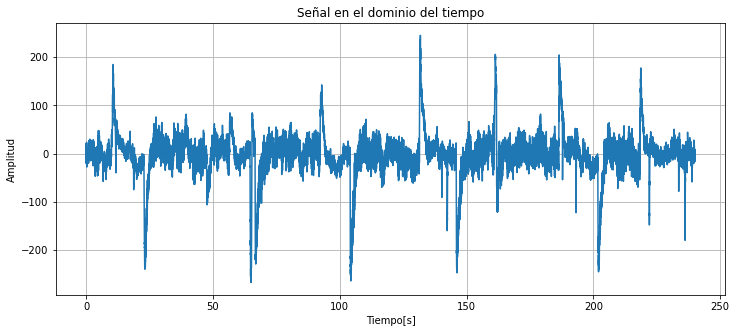

In [56]:
# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 5))
plt.plot(tiempo, senal)
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.title('Señal en el dominio del tiempo')
plt.grid(True)
plt.show()


* **Obten el espectro de frecuencias de la señal. Grafica nuevamente el espectro en un rango entre los 8 y 13 Hz.**



In [57]:
# Calcular la transformada de Fourier
espectro = fft(senal)
frecuencias = fftfreq(len(senal), 1/fs)
espectro_desplazado = fftshift(espectro)
frecuencias_desplazadas = fftshift(frecuencias)

La función <code>**fftshift**</code> en el contexto de procesamiento de señales se utiliza para desplazar el espectro de frecuencia obtenido mediante la transformada de Fourier.

Cuando se aplica la transformada de Fourier a una señal discreta, el espectro resultante se organiza de manera que los componentes de frecuencia más bajos se encuentran en los extremos del espectro. Sin embargo, a veces es más conveniente visualizar el espectro con los componentes de frecuencia centrados en el espectro.

La función <code>**fftshift**</code> realiza este desplazamiento moviendo los componentes de frecuencia más bajos al centro del espectro y ajustando los demás componentes de manera correspondiente.

In [58]:
# Seleccionar el rango de frecuencia entre 8 Hz y 13 Hz
inicio = np.argmax(frecuencias_desplazadas >= 8)
fin = np.argmax(frecuencias_desplazadas >= 13)


En este caso, **inicio** y **fin** son variables que almacenan los índices correspondientes a los valores en el arreglo **frecuencias_desplazadas** que cumplen con una determinada condición.

inicio almacena el índice del primer valor en **frecuencias_desplazadas** que es mayor o igual a 8.
fin almacena el índice del primer valor en **frecuencias_desplazadas** que es mayor o igual a 13.

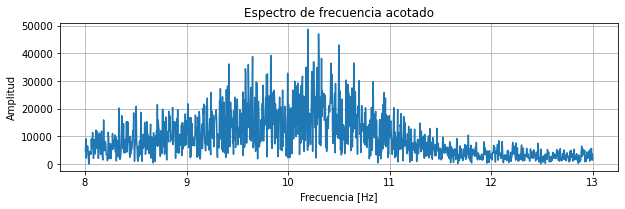

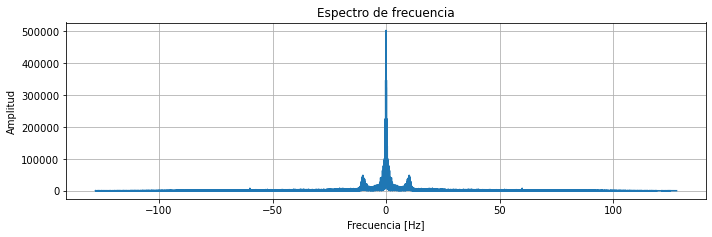

In [80]:
# Graficar el espectro de frecuencia en el rango seleccionado

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(frecuencias_desplazadas[inicio:fin], np.abs(espectro_desplazado[inicio:fin]))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia acotado')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2,1,2)
plt.plot(frecuencias_desplazadas, np.abs(espectro_desplazado))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

* **Diseña y programa un filtro FIR pasabanda de orden N>4 con aproximacion Chebysheff que filtre la señal de EEG en el rango de frecuencias de las ondas alfa.**

C:\Users\tania\AppData\Local\Temp\ipykernel_19080\3862495405.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w,20* np.log10(abs(h)));


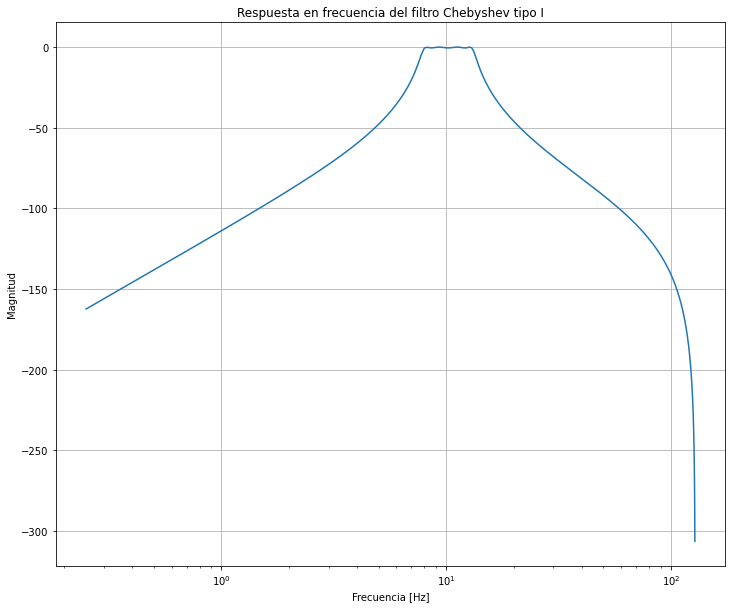

In [77]:
# disena y Grafica el filtro
chevyfiltro1 = signal.cheby1(N=4, rp=0.5, Wn=[8,13], btype='bandpass', fs=fs, output='sos')

w, h = signal.sosfreqz(chevyfiltro1, fs=fs)

plt.figure(figsize=(12, 10))
plt.semilogx(w,20* np.log10(abs(h)));
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title('Respuesta en frecuencia del filtro Chebyshev tipo I')
plt.grid(True)
plt.show()

La función <code>**signal.sosfreqz**</code> se utiliza para calcular la respuesta en frecuencia de un filtro de segundo orden (SOS) especificado por los coeficientes chevyfiltro1. Esta función retorna dos arreglos:

* **w**: Arreglo de frecuencias normalizadas. Contiene los puntos en el eje de las frecuencias donde se evalúa la respuesta en frecuencia del filtro.
* **h**: Arreglo que representa la respuesta en frecuencia del filtro SOS en los puntos de frecuencia w. Contiene los valores complejos que representan la magnitud y fase de la respuesta en frecuencia del filtro.

* **Filtra la senal y grafıcala el dominio del tiempo.**

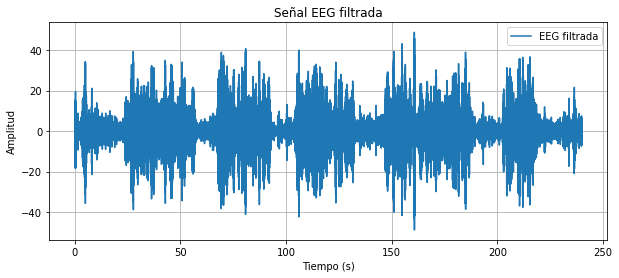

In [61]:
# Filtrar la señal EEG
filtered_ecg1 = signal.sosfilt(chevyfiltro1, senal)

plt.figure(figsize=(10, 4))
plt.plot(tiempo, filtered_ecg1, label='EEG filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal EEG filtrada')
plt.legend()
plt.grid(True)
plt.show()

La función **signal.sosfilt** se utiliza para aplicar un filtro de segundo orden (SOS) especificado por los coeficientes chevyfiltro1 a una señal de entrada senal. El resultado es la señal filtrada.

*  **Diseña un filtro FIR pasa-bajas y un filtro FIR pasa-altas de orden N >49 y ventanas Han/Hanning para filtrar la señal de EEG en el rango de frecuencias de las ondas alfa**

In [62]:
# Obtener la señal del archivo
senal = data['x']
senal = np.array(senal).flatten()
# Obtener la frecuencia de muestreo
fs=data['fs'][0]
Ts=1/fs

# Crear el vector de tiempo
tiempo = np.arange(len(senal)) / fs

La función **np.arange** de NumPy se utiliza para crear un arreglo de valores que varían de manera regular dentro de un rango especificado. Toma como argumentos los valores de inicio, final y paso.

In [63]:
#diseno del primer filtro
N = 49
pasabaja = signal.firwin(N, cutoff=13, window="hamming", pass_zero='lowpass', fs=fs)

#diseno del segundo filtro
pasaalta = signal.firwin(N, cutoff=8, window="hamming", pass_zero="highpass", fs=fs)

La función <code>signal.firwin</code> de la biblioteca <code>SciPy</code> se utiliza para diseñar filtros FIR (Respuesta al Impulso Finita). Esta función permite generar los coeficientes de un filtro FIR utilizando diferentes métodos de diseño.

La sintaxis general de signal.firwin es la siguiente:




<code>signal.firwin(numtaps, cutoff, window='hamming', pass_zero=True, fs=1.0)</code>

* **numtaps** es el número de coeficientes del filtro, determina la longitud del filtro.
* **cutoff** es la frecuencia de corte o las frecuencias de corte del filtro. Puede ser un solo valor para filtros pasabajos o pasaltos, o una tupla de dos valores para filtros pasabanda o rechazabanda.
* **window** es la ventana que se utilizará en el diseño del filtro. Puede ser una cadena de texto que representa el nombre de una ventana predefinida (por ejemplo, 'hamming', 'hann', 'blackman'), o puede ser un arreglo que define una ventana personalizada.
* **pass_zero** es un valor booleano que indica si el filtro debe tener una respuesta pasabanda (False) o una respuesta pasabajos/pasaltos (True).
* **fs** es la frecuencia de muestreo del sistema.



In [64]:
# Respuesta al impulso del primer filtro
t_impulso = np.arange(N) * Ts
impulso1 = np.zeros(N)
impulso1[0] = 1
respuesta_impulso1 = signal.lfilter(pasabaja, 1, impulso1)

# Respuesta al impulso del segundo filtro
impulso2 = np.zeros(N)
impulso2[0] = 1
respuesta_impulso2 = signal.lfilter(pasaalta, 1, impulso2)

La función <code>**signal.lfilter**</code> de la biblioteca SciPy se utiliza para aplicar un filtro lineal a una señal utilizando los coeficientes del filtro. Esta función implementa una filtración en el dominio del tiempo utilizando una implementación de convolución.

la sintaxis general de <code>**signal.lfilter**</code> es la siguiente:

```
# signal.lfilter(b, a, x)

```

* **b** es un array 1-D que contiene los coeficientes del numerador del filtro (coeficientes de feedforward).
* **a** es un array 1-D que contiene los coeficientes del denominador del filtro (coeficientes de feedback).
* **x** es la señal de entrada que se va a filtrar.



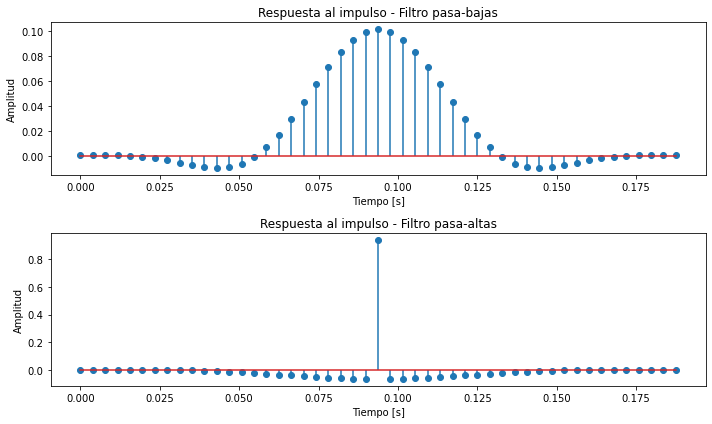

In [65]:
# Graficar la respuesta al impulso de ambos filtros
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(t_impulso, respuesta_impulso1)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Respuesta al impulso - Filtro pasa-bajas')

plt.subplot(2, 1, 2)
plt.stem(t_impulso, respuesta_impulso2)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Respuesta al impulso - Filtro pasa-altas')

plt.tight_layout()

* **Grafica la respuesta en frecuencia de ambos filtros.**

In [66]:
# Calcular la respuesta en frecuencia de los filtros
w1, h1 = signal.freqz(pasabaja)
w2, h2 = signal.freqz(pasaalta)

La función <code>**signal.freqz**</code> de la biblioteca <code>SciPy</code> se utiliza para calcular la respuesta de frecuencia de un sistema de filtrado. En el contexto de la función <code>**signal.freqz(pasabaja)**</code>, se está calculando la respuesta de frecuencia del filtro pasabaja.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


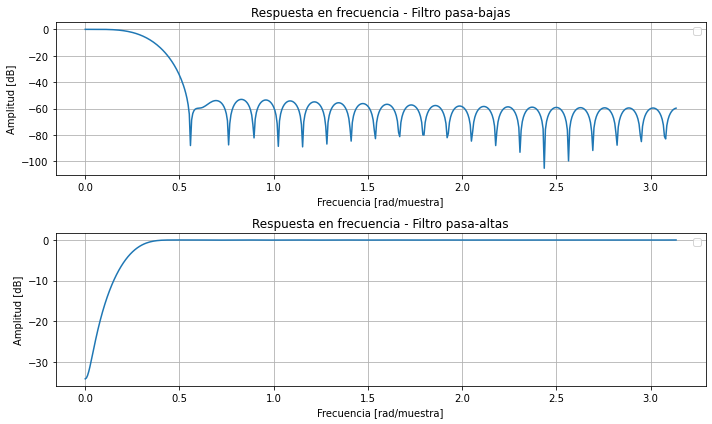

In [67]:
# Graficar la respuesta en frecuencia de ambos filtros
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w1, 20 * np.log10(abs(h1)))
plt.xlabel('Frecuencia [rad/muestra]')
plt.ylabel('Amplitud [dB]')
plt.title('Respuesta en frecuencia - Filtro pasa-bajas')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(w2, 20 * np.log10(abs(h2)))
plt.xlabel('Frecuencia [rad/muestra]')
plt.ylabel('Amplitud [dB]')
plt.title('Respuesta en frecuencia - Filtro pasa-altas')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

* **A partir de los dos sistemas, filtra la senal de EEG y grafícala en el dominio del tiempo.**

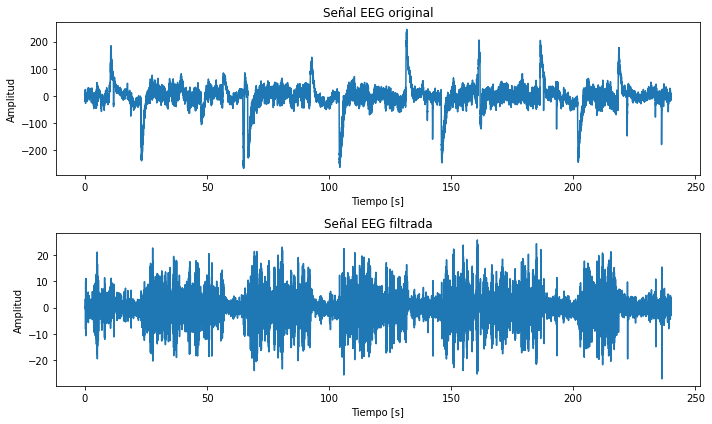

In [68]:
# Filtrar la señal de EEG con el filtro pasa-bajas
senalfiltrada3 = signal.lfilter(pasabaja, 1, senal)

# Filtrar la señal de EEG con el filtro pasa-altas
senalfiltrada4= signal.lfilter(pasaalta, 1,senalfiltrada3)

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo, senal)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal EEG original')

plt.subplot(2, 1, 2)
plt.plot(tiempo, senalfiltrada4)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal EEG filtrada')

plt.tight_layout()
plt.show()

* **Grafica la respuesta al impulso del sistema en el dominio del tiempo discreto.**

Text(0.5, 1.0, 'Respuesta al impulso - Filtro pasa-bandas')

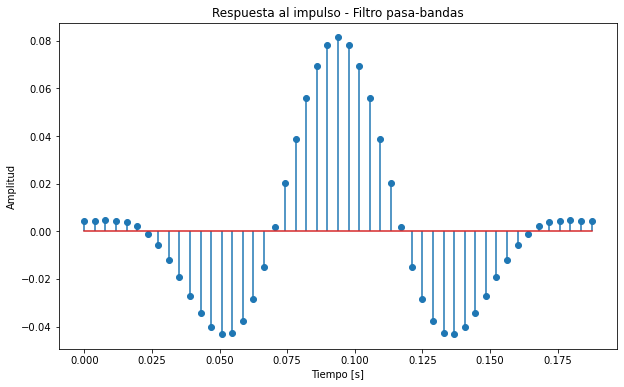

In [83]:
fc = [8, 13]  # Frecuencias de corte del filtro en Hz

# Diseñar el filtro FIR pasabanda
pasabanda = signal.firwin(N, fc, window="hamming", pass_zero='bandpass', fs=fs)

# calcular la respuesta al impulso
t_impulso = np.arange(N) * Ts
impulso3 = np.zeros(N)
impulso3[0] = 1
respuesta_impulso3 = signal.lfilter(pasabanda, 1, impulso3)

# Grafica
plt.figure(figsize=(10, 6))
plt.stem(t_impulso, respuesta_impulso3)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Respuesta al impulso - Filtro pasa-bandas')

* **Grafica la respuesta en frecuencia de ambos filtros.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


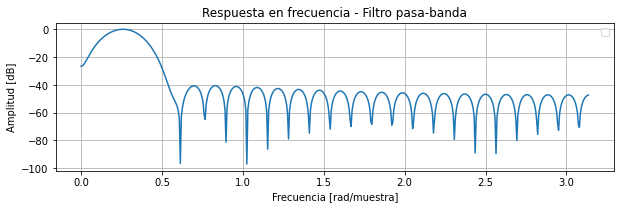

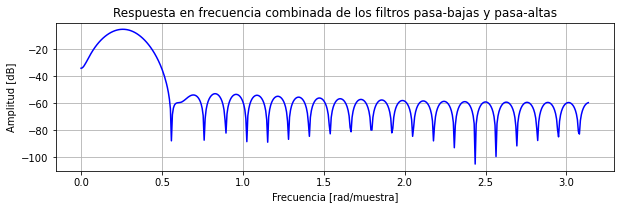

In [70]:
# Calcular la respuesta en frecuencia de los filtros
w3, h3 = signal.freqz(pasabanda)

# Graficar la respuesta en frecuencia de ambos filtros
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w3, 20 * np.log10(abs(h3)))
plt.xlabel('Frecuencia [rad/muestra]')
plt.ylabel('Amplitud [dB]')
plt.title('Respuesta en frecuencia - Filtro pasa-banda')
plt.grid(True)
plt.legend()

# Calcular la respuesta en frecuencia de ambos filtros
w1, h1 = signal.freqz(pasabaja)
w2, h2 = signal.freqz(pasaalta)

# Multiplicar las magnitudes de las respuestas en frecuencia
respuesta_combinada = h1 * h2

# Aplicar transformación logarítmica a la respuesta en frecuencia combinada
respuesta_combinada_db = 20 * np.log10(abs(respuesta_combinada))
# Graficar la respuesta en frecuencia combinada en decibelios
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(w1, respuesta_combinada_db, 'b')
plt.xlabel('Frecuencia [rad/muestra]')
plt.ylabel('Amplitud [dB]')
plt.title('Respuesta en frecuencia combinada de los filtros pasa-bajas y pasa-altas')
plt.grid(True)
plt.show()

* **Mediante la convolución de la respuesta al impulso con la señal de entrada, filtra la señal de EEG y grafica el resultado en el dominio del tiempo.**

In [71]:
# Filtrar la señal de EEG
senal_filtrada = signal.convolve(senal, respuesta_impulso3, mode='same')

La función <code>**signal.convolve**</code> de la biblioteca SciPy se utiliza para realizar la convolución de dos señales. En el contexto de <code>**senal_filtrada = signal.convolve(senal, respuesta_impulso3, mode='same')**</code>, se está realizando la convolución entre la señal **senal** y la respuesta al impulso del filtro **respuesta_impulso3.**

La sintaxis general de <code>**signal.convolve**</code> es la siguiente:


```
# output = signal.convolve(signal1, signal2, mode='full')
```
* **signal1** es un array 1-D que representa la primera señal a convolucionar.
* **signal2** es un array 1-D que representa la segunda señal a convolucionar.
* **mode** es un parámetro opcional que especifica el modo de manejo de los bordes. Puede tomar los valores 'full', 'valid' o 'same' (por defecto 'full').
La función <code>signal.convolve</code> devuelve un array 1-D que representa la señal resultante de la convolución.



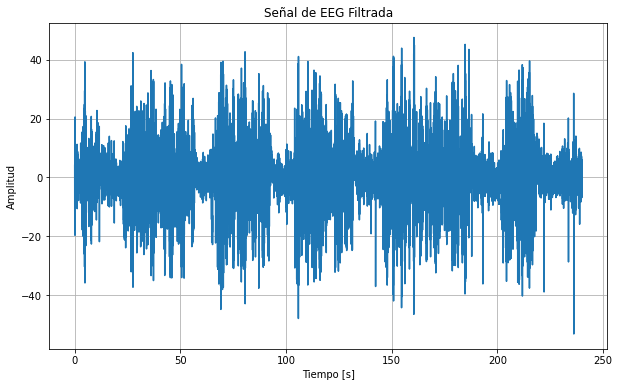

In [72]:
# Graficar el resultado en el dominio del tiempo
plt.figure(figsize=(10, 6))
t = np.arange(len(senal)) * Ts
plt.plot(t, senal_filtrada)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal de EEG Filtrada')
plt.grid(True)
plt.show()